# Project Business Statistics: E-news Express



## Define Problem Statement and Objectives

## Context

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

### Objective:

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

1. Explore the dataset and extract insights using Exploratory Data Analysis.
2. Do the users spend more time on the new landing page than the old landing page?
3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
5. Is the mean time spent on the new page same for the different language users?

*Consider a significance level of 0.05 for all tests.

### Data Dictionary:

1. user_id - This represents the user ID of the person visiting the website.
2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).
3. landing_page - This represents whether the landing page is new or old.
4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [2]:
# write the code for reading the dataset abtest.csv
data = pd.read_csv('abtest.csv')

### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [3]:
data.head() # view few rows of data

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Observation

In [4]:
data.shape  # check the shape of the data

(100, 6)

#### Observation
There are 100 rows and 6 columns in the data

In [5]:
data.info() # check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observation
Four columns have object datatypes that need to be converted to category datatypes 

In [6]:
# convert object data types to category
data['group'] = data['group'].astype('category')
data['landing_page'] = data['landing_page'].astype('category')
data['converted'] = data['converted'].astype('category')
data['language_preferred'] = data['language_preferred'].astype('category')

# check data types again to validate changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.5 KB


#### Observation
The four 'objects' have been converted to 'category' and the memory usage has been reduced 

In [7]:
# check missing value
data.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observation
There are no null values in any of the columns

In [8]:
# view summary statistics 
data.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


#### Observation
1. Minimum time spent on the page is 0.19 minutes
2. Average time spent on the page is 5.38 minutes
3. Maximum time spent on the page is 10.71 minutes

In [9]:
data['group'].value_counts()

treatment    50
control      50
Name: group, dtype: int64

#### Observation
There are 2 unique groups (treatment and control) with 50 users each

In [10]:
data['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

#### Observation
There are 2 unique landing pages (old and new) with 50 users for each

In [11]:
data['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

#### Observation
There are 3 unique preferred languages (Spanish, French and English) with 34, 34 and 32 users respectively

In [12]:
data['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

#### Observation
54 users got converted and 46 did not get converted after visiting the landing page

### Univariate Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

### Distribution plot of time spent on the page

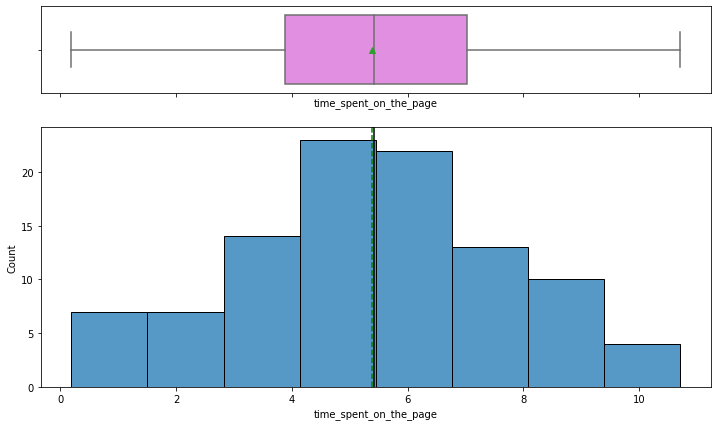

In [15]:
histogram_boxplot(data, 'time_spent_on_the_page')

#### Observation
The distribution of the time spent on the page looks normal

### Barplot of group with percentage split

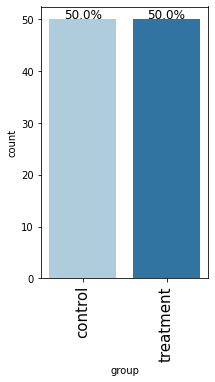

In [16]:
labeled_barplot(data, 'group', perc=True)

### Barplot of converted users with percentage split

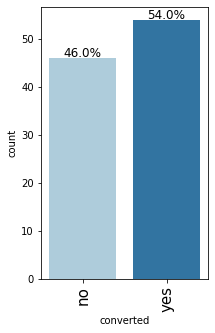

In [17]:
labeled_barplot(data, 'converted', perc=True)

### Barplot of language preferred with percentage split

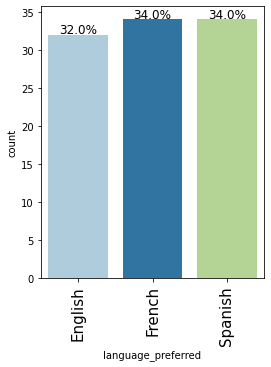

In [18]:
labeled_barplot(data, 'language_preferred', perc=True)

### Barplot of landing page with percentage split

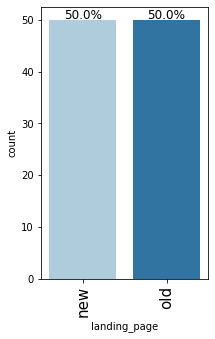

In [19]:
labeled_barplot(data, 'landing_page', perc=True)

### Barplot of landing page type by conversion 

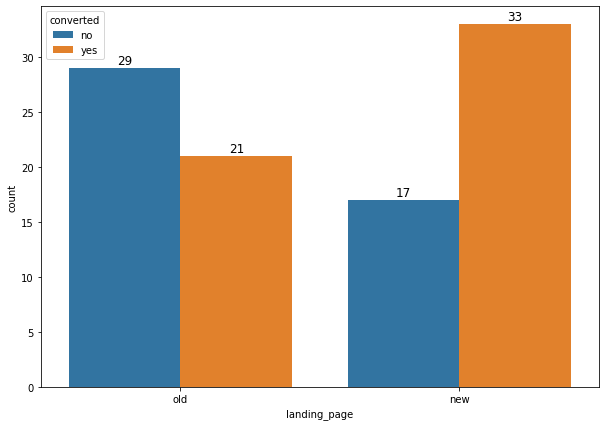

In [20]:
# ordered barplot showing the count of orders for each cuisine type by rating_status
plt.figure(figsize=(10, 7)) # To resize the plot
ax = sns.countplot( x='landing_page', data=data, hue='converted',order=data['landing_page'].value_counts().index )
for p in ax.patches:
        label = p.get_height() 
 #      label = "{:.1f}%".format(100 * p.get_height() / len(data['landing_page']))  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height() + 0.25     # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points") 
plt.show()

#### Observation
The number converted users seems to be higher for new landing page than old landing page. This can be statistically verified later

### Barplot of preferred language by conversion 

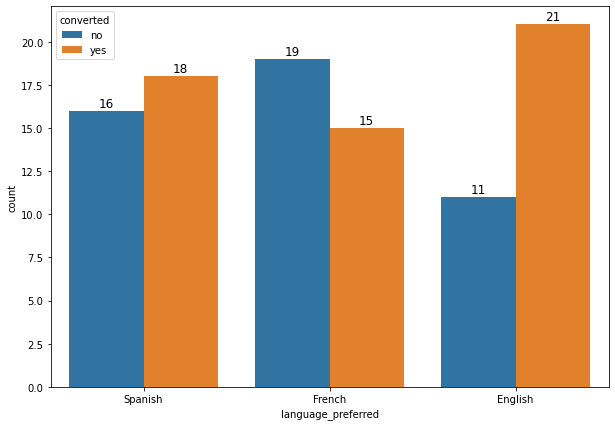

In [21]:
plt.figure(figsize=(10, 7)) # To resize the plot
ax = sns.countplot( x='language_preferred', data=data, hue='converted',order=data['language_preferred'].value_counts().index )
for p in ax.patches:
        label = p.get_height() 
 #      label = "{:.1f}%".format(100 * p.get_height() / len(data['landing_page']))  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height() + 0.15     # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points") 
plt.show()

#### Observation
The number converted users seems to vary with language preferred with English appearing to have the highest conversion rate. This can also be statistically verified later

### Bivariate Analysis

### Landing page vs Time spent on the page

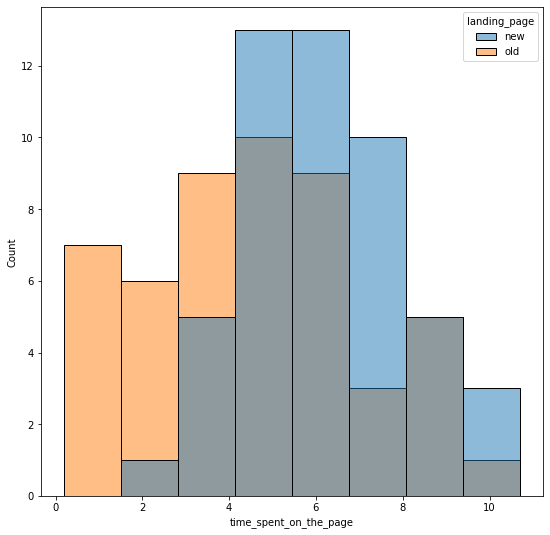

In [22]:
plt.figure(figsize=(9, 9))
sns.histplot(data = data, x = 'time_spent_on_the_page', hue = 'landing_page')
plt.show()

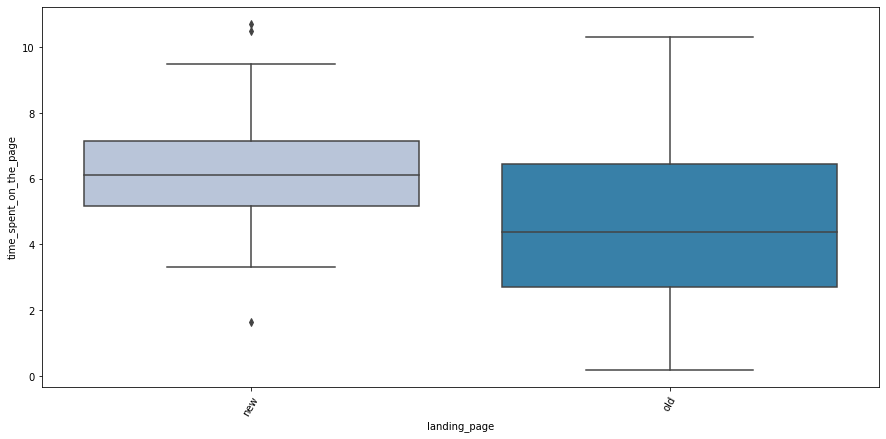

In [23]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "landing_page", y = "time_spent_on_the_page", data = data, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observation
The time spent on the landing page seems higher for new page than old page. 
Further statistical test can help provide evidence to either back this claim or otherwise

### Conversion status vs Time spent on the page

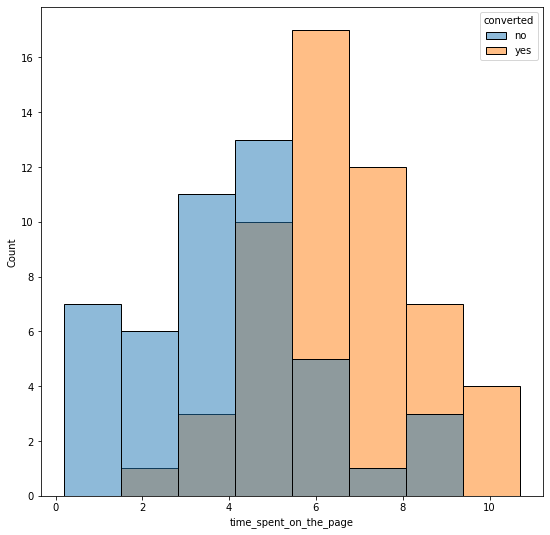

In [24]:
plt.figure(figsize=(9, 9))
sns.histplot(data = data, x = 'time_spent_on_the_page', hue = 'converted')
plt.show()

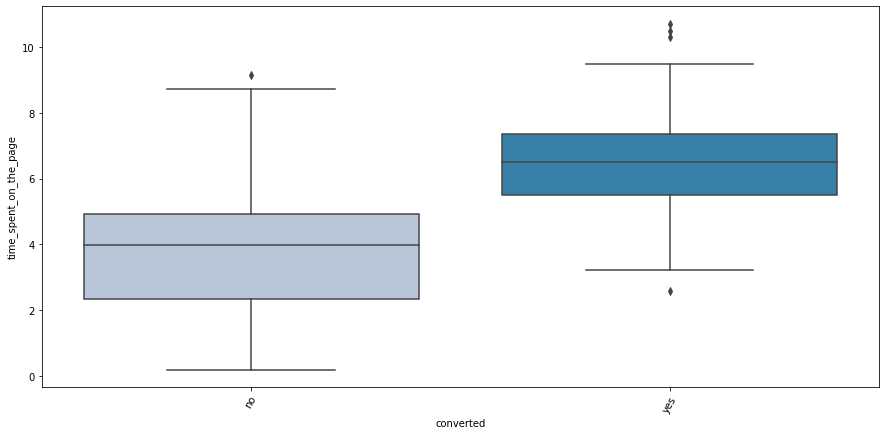

In [25]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "converted", y = "time_spent_on_the_page", data = data, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observation
People who got converted seemed to have spent more time on the landing page than people who did not get converted. Further statistical test can help provide evidence to either back this claim or otherwise

### Preferred language vs Time spent on the page

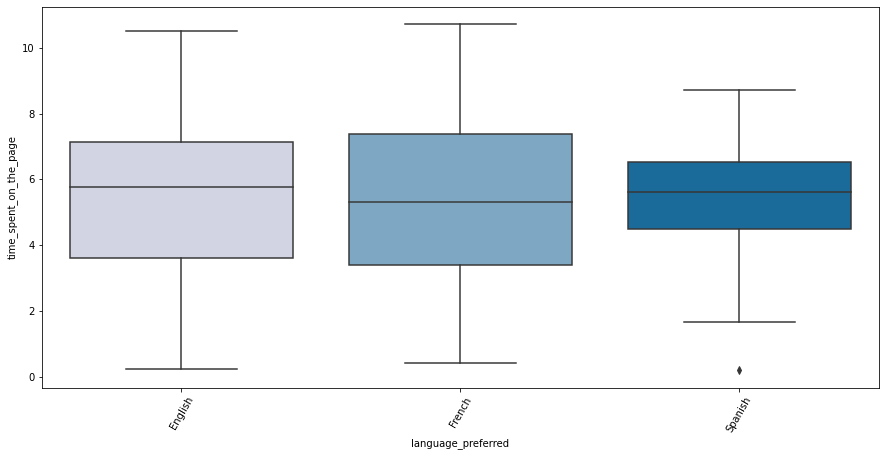

In [26]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "language_preferred", y = "time_spent_on_the_page", data = data, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observation
The time spent on the page seems to be similar across all three preferred languages. Further statistical test can help provide evidence to either back this claim or otherwise 

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

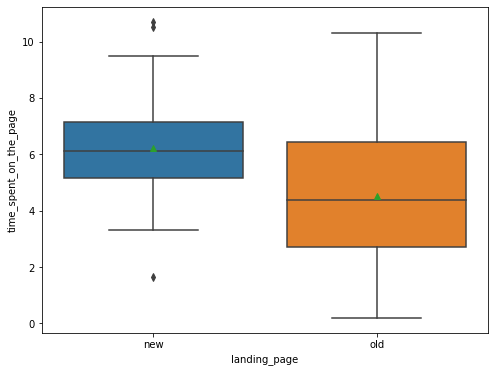

In [27]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = data,showmeans=True)
plt.show()

#### Observation
Means and median time spent on landing page seems to be higher for new page vs old page

### Step 1: Define the null and alternate hypotheses

$H_0$ : $\mu_{new}$ = $\mu_{old}$,  the average time spent on the new landing page is the same as time spent on the old landing page

$H_a$ : $\mu_{new}$ > $\mu_{old}$,  the average time spent on the new landing page is greater than time spent on the old landing page


$\mu_{new}$  - average time spent on new landing page

$\mu_{old}$  - average time spent on old landing page

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. 

**Based on this information, the appropriate test is 2 Independent sample t-test**.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [28]:
# create subsetted data frame for new landing page users 
time_spent_new = data[data['landing_page'] == 'new']['time_spent_on_the_page']
# create subsetted data frame for old landing page users
time_spent_old = data[data['landing_page'] == 'old']['time_spent_on_the_page']

# find the sample means and sample standard deviations for the two samples
print('The mean time spent on new landing page is ' + str(round(time_spent_new.mean(),2)))
print('The mean time spent on old landing page is ' + str(round(time_spent_old.mean(),2)))
print('The standard deviation of time spent on new landing page is ' + str(round(time_spent_new.std(),2)))
print('The standard deviation of time spent on old landing page is ' + str(round(time_spent_old.std(),2)))


The mean time spent on new landing page is 6.22
The mean time spent on old landing page is 4.53
The standard deviation of time spent on new landing page is 1.82
The standard deviation of time spent on old landing page is 2.58


### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the usage time is measured on a continuous scale.
* Normally distributed populations - Yes, based on the distribution of the time spent on landing page, the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups of users, the two samples are from two independent populations.
* Equal population standard deviations - As the sample standard deviations are not close to being equal, the population standard deviations may be assumed to be unequal.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Thus, We can use two sample T-test for this problem.


### Step 5: Calculate the p-value

In [29]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [30]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

### Conclusion
As the p-value (~0.00014) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that the average time spent on new landing page is greater than the average time spent on the old landing page

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

### Perform Visual Analysis

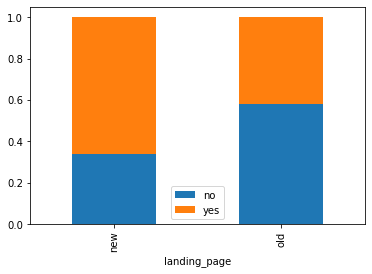

In [31]:
# create a stacked bar plot to compare the distributions of both conversion status and landing page 
pd.crosstab(data['landing_page'], data['converted'],normalize='index').plot(kind='bar',stacked =True)
plt.legend()
plt.show()

#### Observation
Conversion status seems to be higher for new landing page vs old landing page

### Step 1: Define the null and alternate hypotheses

$H_0$ : $p_{new}$ = $p_{old}$,  The proportion of users who visit the new landing page and get converted is the same as that of the old landing page

$H_a$ : $p_{new}$ > $p_{old}$,  The proportion of users who visit the new landing page and get converted is greater than that of the old landing page


$p_{new}$  - The proportion of users who visit the new landing page and get converted

$p_{old}$  - The proportion of users who visit the old landing page and get converted

### Step 2: Select Appropriate test

The formulated hypotheses are concerned with proportions. A test of proportions can be used to analyse the hypotheses and draw a conclusion. 

**Based on this information, the appropriate test is Proportions Z test**.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [32]:
# calculate proportion of users who visit new landing page

n_new = data[data['group'] == 'treatment']['user_id'].count() # number of users who visit new landing page
new_yes = data[(data['group'] == 'treatment') & (data['converted'] == 'yes')]['user_id'].count() # number of converts
p_new_yes = new_yes/n_new  # proportion

print('The number of users on new landing page is ' + str(n_new))
print('The number of users on new landing page that got converted is ' + str(new_yes))
print('The proportion of users who visit the new landing page and get converted) is ' + str(new_yes) + '/' + str(n_new) + '='+ str(p_new_yes))



The number of users on new landing page is 50
The number of users on new landing page that got converted is 33
The proportion of users who visit the new landing page and get converted) is 33/50=0.66


In [33]:
# calculate proportion of users who visit old landing page

n_old = data[data['group'] == 'control']['user_id'].count()  # number of users who visit old landing page
old_yes = data[(data['group'] == 'control') & (data['converted'] == 'yes')]['user_id'].count() # number of converts
p_old_yes = old_yes/n_old  # proportion
print('The number of users on old landing page is ' + str(n_old))
print('The number of users on old landing page that got converted is ' + str(old_yes))
print('The proportion of users who visit the old landing page and get converted) is ' + str(old_yes) + '/' + str(n_old) + '='+ str(p_old_yes))



The number of users on old landing page is 50
The number of users on old landing page that got converted is 21
The proportion of users who visit the old landing page and get converted) is 21/50=0.42


### Test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a product is either defective or non-defective.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_{new} = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_{new}) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_{old} = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_{old}) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $


### Step 5: Calculate the p-value

In [34]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# find the p-value using proportion_ztest
stat, pval = proportions_ztest([new_yes, old_yes] , [n_new, n_old], alternative = 'larger')

# print the p-value
print('The p-value is '+ str(pval))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [35]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

### Conclusion
As the p-value (~0.008) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that the proportion of users who visit the new landing page and get converted is greater than that of the old landing page i.e the conversion rate for new landing page is greater than that of the old landing page

## 4. Is the conversion and preferred language independent or related? (10 Marks)

### Perform Visual Analysis

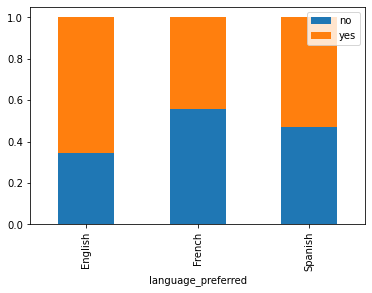

In [36]:
# create a stacked bar plot to compare the distributions of both conversion status and preferred language 
pd.crosstab(data['language_preferred'], data['converted'],normalize='index').plot(kind='bar',stacked =True)
plt.legend()
plt.show()

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0:$ Preferred language is independent of conversion.

against the alternate hypothesis

>$H_a:$ Preferred language NOT independent of conversion.

### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


### Step 2: Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. 

**Based on this information, the appropriate test is Chi-Square Test for Independence**.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [37]:
contingency_table = pd.crosstab(data['converted'], data['language_preferred'])  

contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [38]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, pvalue, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', pvalue)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [39]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {pvalue} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pvalue} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

### Conclusion
Since the pvalue (~ 0.21) is > 0.05, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that language preference is NOT independent of conversion.

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

### Perform Visual Analysis

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


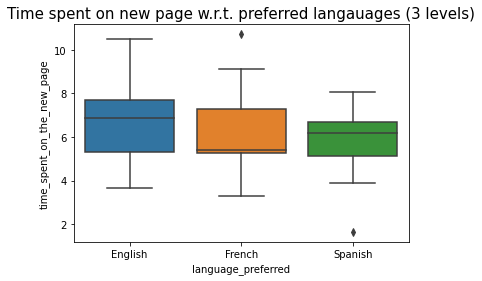

In [40]:
# create sub dataset for time spent on new landing page
data_new = data[data['landing_page'] == 'new']

print(data_new.groupby("language_preferred")["time_spent_on_the_page"].mean())


# visual analysis of the time spent on new landing page for the three preferred languages
a = sns.boxplot(y="time_spent_on_the_page", x="language_preferred", data = data_new)
a.set_ylabel('time_spent_on_the_new_page')
a.set_title("Time spent on new page w.r.t. preferred langauages (3 levels)", fontsize=15)
plt.show()

### Step 1: Define the null and alternate hypotheses


Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new landing page for preferred languages English, French and Spanish respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least the average time spent on new landing page for one level is different from the rest.

### Let's test whether the assumptions are satisfied or not

The normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ The weight losses follow a normal distribution

against the alternative hypothesis

>$H_a:$ The weight losses do not not follow a normal distribution

In [41]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test
import scipy.stats as stats

# find the p-value
w, p__value = stats.shapiro(data_new['time_spent_on_the_page']) 
print('The p-value is', p__value)

The p-value is 0.8040016293525696


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [42]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test

# find the p-value
statistic, p_value = stats.levene(data_new[data_new['language_preferred']=='English']['time_spent_on_the_page'],
                            data_new[data_new['language_preferred']=='French']['time_spent_on_the_page'],
                            data_new[data_new['language_preferred']=='Spanish']['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

### Step 2: Select Appropriate test

This is a problem, concerning three population means. The normality and equality of variance assumptions above have also been verified. 

**Based on this information, the appropriate test is One-way ANOVA**.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [43]:
# separate the time spent on new page with respect to the three preferred languages 
Time_on_new_page_English = data_new[data_new['language_preferred']=='English']['time_spent_on_the_page']
Time_on_new_page_French = data_new[data_new['language_preferred']=='French']['time_spent_on_the_page']
Time_on_new_page_Spanish = data_new[data_new['language_preferred']=='Spanish']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [44]:
# perform one-way anova test using the f_oneway function from scipy.stats library
test_stat, p_value = stats.f_oneway(Time_on_new_page_English, Time_on_new_page_French, Time_on_new_page_Spanish)
print('The p-value is ', p_value)

The p-value is  0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [45]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

### Conclusion
Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean time spent on the new landing page with respect to languages are not different.

## Conclusion and Business Recommendations

**From the various tests performed we are able to infer that:**

1. The average time spent on new landing page is greater than the average time spent on the old landing page and the conversion rate for new landing page is greater than that of the old landing page. Hence, it is recomended that the business stick with te new features in the new landing page. More time spent will generate more web clicks and can potentially lead to increase in ROI from ads.

2. While the average time spent on the new landing page with respect to languages are not different, we have evidence to support that the language preference is NOT independent of conversion rate. Hence, it is recommended that the business include a feature where users can translate the page to their preferred languages especially English, French and Spanish.
